## Deutsch-Jozsa Algorithm Implementation in Qiskit

In [9]:
# import the necessary modules
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit import QuantumCircuit

In [46]:
# define the number of qubits
n = 100
qc = QuantumCircuit(n + 1, n)

# flip the helper qubit
qc.z(n)

# apply H gates
qc.h(range(n+1))

qc.barrier()

# implement the oracle (blackbox function)
# for a balanced function, CNOT can be used as the oracle
# qc.x(n)

# oracle for a balanced blackbox function
qc.cx(0, n)

qc.barrier()

# apply H gates again (exclude the helper)
qc.h(range(n))

qc.barrier()

# measurement
qc.measure(range(n), range(n))

# draw the circuit
# qc.draw(output = 'mpl')

Counts(ideal): {'0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 1024}


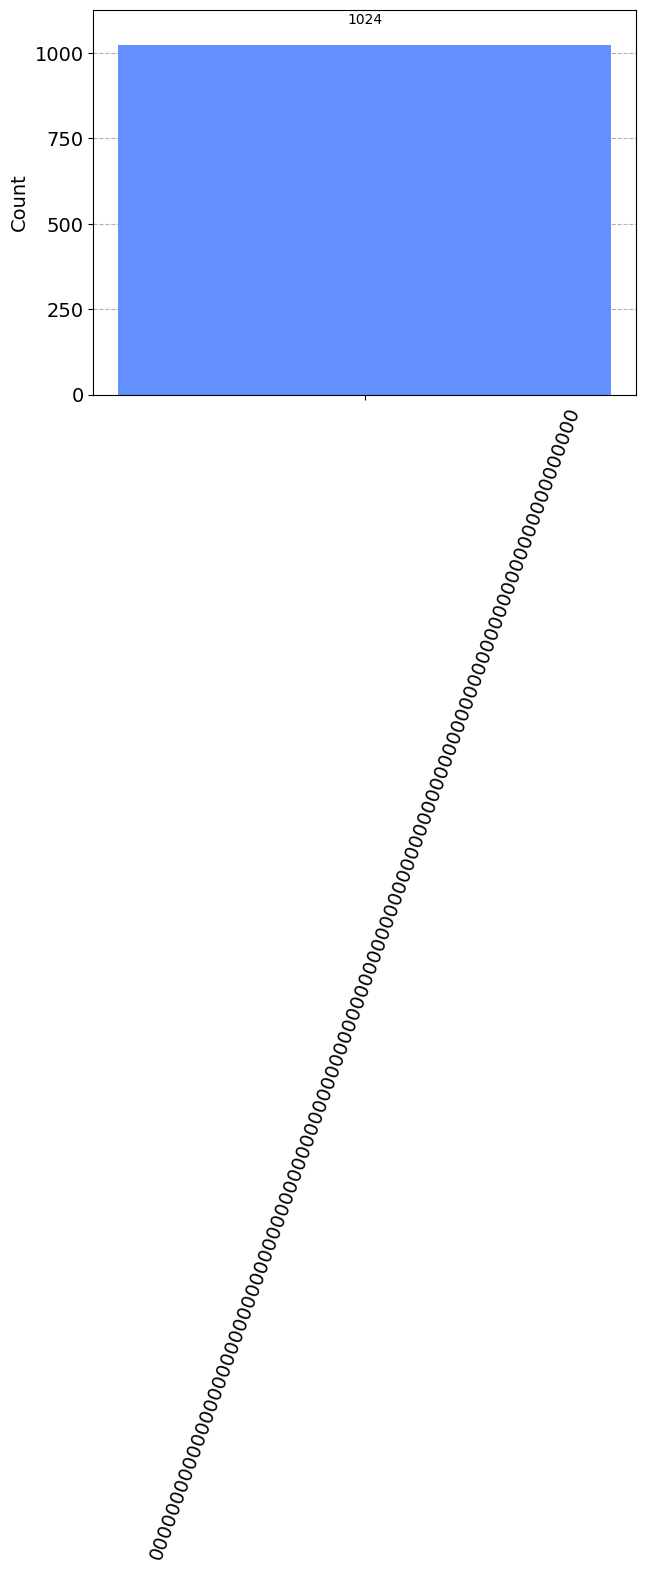

In [47]:
# Running the circuit
from qiskit_aer import AerSimulator

# we will use Aer's qasm_simulator
aersim = AerSimulator()

# get the results and the counts and plot a histogram
result_ideal = aersim.run(qc).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)

plot_histogram(counts_ideal)

Counts(noise): {'01': 137, '11': 3, '10': 21, '00': 863}


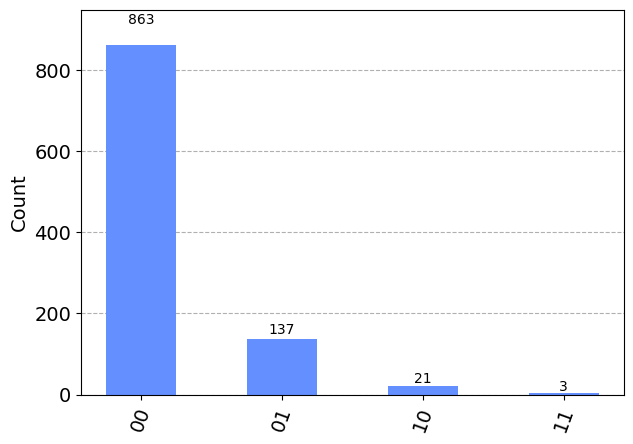

In [41]:
from qiskit.providers.fake_provider import FakeManilaV2

# Construct a noisy simulator backend from an IBMQ backend
# This simulator backend will be automatically configured
# using the device configuration and noise model
backend = FakeManilaV2()
aersim_backend = AerSimulator.from_backend(backend)

# Perform noisy simulation
result_noise = aersim_backend.run(qc).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)

plot_histogram(counts_noise)

Text(0, 0.5, 'Execution Time')

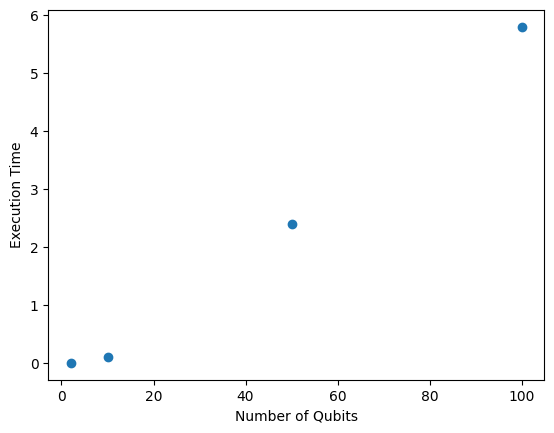

In [49]:
# plot for scalability of circuit

import matplotlib.pyplot as plt

num_qubits = [2, 10, 50, 100]
exec_time = [0.0, 0.1, 2.4, 5.8]

plt.scatter(num_qubits, exec_time)
plt.xlabel("Number of Qubits")
plt.ylabel("Execution Time")